Source du code utilisé : 
https://learnopencv.com/super-resolution-in-opencv/

# **FSRCNN model**

In [ ]:
import cv2
from cv2 import dnn_superres
import matplotlib.pyplot as plt
import numpy as np
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read image
image = cv2.imread('papillon.jpg')

# Read the desired model
path = "FSRCNN_x2.pb"
sr.readModel(path)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("fsrcnn", 2)

image.shape

(628, 1200, 3)

In [ ]:
def downscaling_NB(img,facteur,fonction):
    w,h = img.shape
    w = w//facteur
    h = h//facteur
    res = np.zeros((w,h))
    for i in range(w):
        i_img = i*facteur
        for j in range(h):
            j_img = j*facteur
            res[i,j] = fonction(img[i_img:i_img+facteur,j_img:j_img+facteur])
    return res

In [ ]:
def downscaling(img_rgb,facteur,fonction):
    if len(img_rgb.shape) == 3:
        n,p,_ = img_rgb.shape
        res_rgb = np.zeros((n//facteur, p//facteur,3))
        for i in range(3):
            res_rgb[:,:,i] = downscaling_NB(img_rgb[:,:,i],facteur,fonction)
    else:
        n,p = img_rgb.shape
        res_rgb = np.zeros((n//facteur, p//facteur))
        res_rgb = downscaling_NB(img_rgb,facteur,fonction)
    return res_rgb.astype(np.int64)

(314, 600, 3)


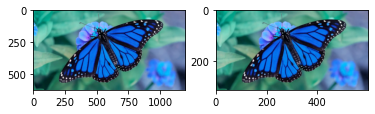

In [ ]:
image_downscaled = downscaling(image, 2, np.mean)
print(image_downscaled.shape)
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image_downscaled)

(1256, 2400, 3)
(628, 1200, 3)


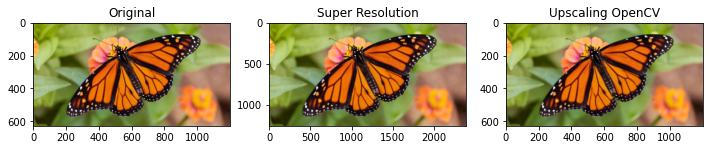

True

In [ ]:
# Upscale the image

result = sr.upsample(image_downscaled.astype(np.uint8))
print(result.shape)
resized = cv2.resize(image_downscaled.astype(np.uint8),dsize=None,fx=2,fy=2)
print(resized.shape)
 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.title("Original")
plt.imshow(image[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.title("Super Resolution")
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.title("Upscaling OpenCV")
plt.imshow(resized[:,:,::-1])
plt.show()
# Save the image
cv2.imwrite("./upscaled_fsrcnn.png", result)

**On calcule l'erreur quadratique moyenne des résultats obtenus par réseaux de neurones et par la fonction resizez par rapport à l'image originale afin d'évaluer l'efficacité de notre modèle FSRCNN:**

In [ ]:
# Root Mean Square Error
def RMSE(x,y):
    return np.sqrt(np.mean((x-y)**2))


In [ ]:
print("RMSE entre original et SR = ", RMSE(image, result))

RMSE entre original et SR =  1.9807575738013137


In [ ]:
print("RMSE entre original et resized = ", RMSE(image, resized))

RMSE entre original et resized =  2.4706885714280418


# **EDSR model**

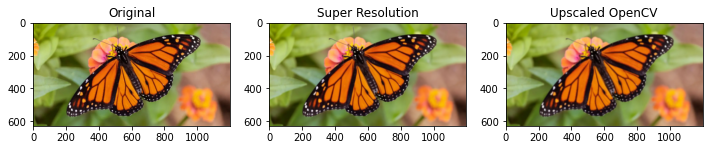

True

In [ ]:
path2 = "EDSR_x4.pb"
sr.readModel(path2)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 4)

image_downscaled2 = downscaling(image, 4, np.mean)
# Upscale the image

result2 = sr.upsample(image_downscaled2.astype(np.uint8))

resized2 = cv2.resize(image_downscaled2.astype(np.uint8),dsize=None,fx=4,fy=4)
 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.title("Original")
plt.imshow(image[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.title("Super Resolution")
plt.imshow(result2[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.title("Upscaled OpenCV")
plt.imshow(resized2[:,:,::-1])
plt.show()
# Save the image
cv2.imwrite("./upscaled_edsr.png", result2)

**On calcule l'erreur quadratique moyenne des résultats obtenus par réseaux de neurones et par la fonction resizez par rapport à l'image originale afin d'évaluer l'efficacité de notre modèle EDSR :**

In [ ]:
print("RMSE entre original et SR = ", RMSE(image, result2))

RMSE entre original et SR =  3.1827577541251446
